### Homework 6 (decision tree, random forest, XGBoost )

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [3]:
!wget $data

--2025-11-03 16:49:42--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.03s   

2025-11-03 16:49:42 (32.5 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [4]:
!head car_fuel_efficiency.csv

engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
170,3,159,3413.433758606219,17.7,2003,Europe,Gasoline,All-wheel drive,0,13.231728906241411
130,5,97,3149.6649342200353,17.8,2007,USA,Gasoline,Front-wheel drive,0,13.688217435463793
170,,78,3079.03899736884,15.1,2018,Europe,Gasoline,Front-wheel drive,0,14.246340998160866
220,4,,2542.392401828378,20.2,2009,USA,Diesel,All-wheel drive,2,16.91273559598635
210,1,140,3460.870989989018,14.4,2009,Europe,Gasoline,All-wheel drive,2,12.488369121964562
190,3,,2484.883986036068,14.7,2008,Europe,Gasoline,All-wheel drive,-1,17.271818372724237
240,7,127,3006.5422872171457,22.2,2012,USA,Gasoline,Front-wheel drive,1,13.210412112385608
150,4,239,3638.6577802809,17.3,2020,USA,Diesel,All-wheel drive,1,12.848883861524026
250,1,174,2714.219309645285,10.3,2016,Asia,Diesel,Front-wheel drive,-1,16.823553726916543


In [5]:
df = pd.read_csv(data)

In [6]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [7]:
print(df.shape)

(9704, 11)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error


In [9]:
print("Shape:", df.shape)
print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nSample rows with missing values:")
display(df[df.isnull().any(axis=1)].head(10))

Shape: (9704, 11)

Data types:
engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

Missing values per column:
engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

Sample rows with missing values:


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
5,190,3.0,NaN,2484.883986,14.7,2008,Europe,Gasoline,All-wheel drive,-1.0,17.271818
11,150,5.0,NaN,1967.200421,12.6,2014,USA,Diesel,Front-wheel drive,2.0,20.504447
18,250,2.0,110.0,2971.214575,NaN,2003,Europe,Gasoline,Front-wheel drive,1.0,14.735962
21,160,4.0,133.0,2659.431451,NaN,2016,Asia,Gasoline,Front-wheel drive,-1.0,16.077730
25,210,6.0,157.0,2860.206191,12.6,2013,USA,Gasoline,All-wheel drive,NaN,15.906422
38,190,5.0,158.0,3761.994038,NaN,2019,Asia,Gasoline,Front-wheel drive,1.0,11.645724
45,380,NaN,139.0,1833.196403,16.7,2022,USA,Gasoline,Front-wheel drive,-1.0,20.728617
47,270,1.0,135.0,3858.914634,NaN,2006,Europe,Gasoline,Front-wheel drive,2.0,10.089818


In [10]:
# Replace NaN and also possible non-numeric markers (like '-') with 0
df = df.replace('-', np.nan).fillna(0)

In [11]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(df[col].median())

In [12]:
print("Remaining missing values:")
print(df.isnull().sum().sum())

Remaining missing values:
0


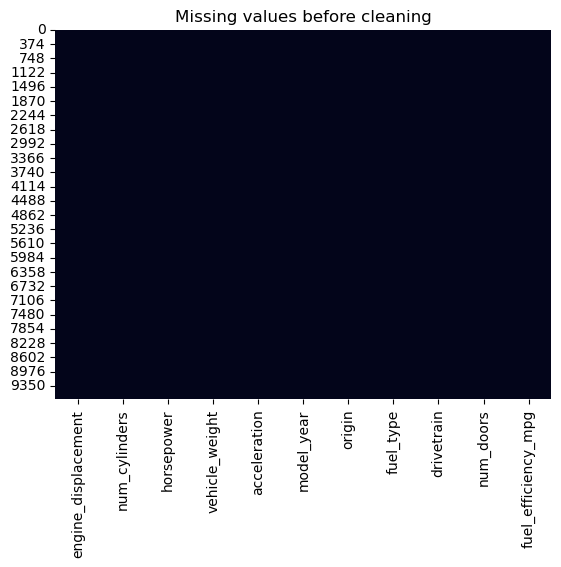

In [13]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing values before cleaning")
plt.show()

### Split the dataset into train (60%), validation (20%), and test (20%) sets, and prepare the data for modeling using DictVectorizer.

In [14]:
# Define target and features
target = 'fuel_efficiency_mpg'
y = df[target].values
X = df.drop(columns=[target])

# Split 60/20/20 using random_state=1 for reproducibility
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")

Train size: 5822
Validation size: 1941
Test size: 1941


**After splitting the dataset, we used DictVectorizer to one-hot encode the categorical features (origin, fuel_type, and drivetrain)
while leaving numerical columns unchanged.
This converts our training data into a sparse matrix suitable for scikit-learn models.**

In [15]:
# One-hot encode categorical features

# Convert dataframes to list of dictionaries
train_dicts = X_train.to_dict(orient='records')
val_dicts   = X_val.to_dict(orient='records')
test_dicts  = X_test.to_dict(orient='records')

# Initialize DictVectorizer
dv = DictVectorizer(sparse=True)

# Fit on training, transform all
X_train_dv = dv.fit_transform(train_dicts)
X_val_dv   = dv.transform(val_dicts)
X_test_dv  = dv.transform(test_dicts)

# Confirm shape after encoding
print("Encoded feature matrix shape:", X_train_dv.shape)
print("Number of encoded features:", len(dv.get_feature_names_out()))

Encoded feature matrix shape: (5822, 14)
Number of encoded features: 14


**Question 1:**
**Train a Decision Tree (max_depth=1)**

In [16]:
# Train a Decision Tree (max_depth=1)
from sklearn.tree import DecisionTreeRegressor, export_text

# Initialize the model
dt1 = DecisionTreeRegressor(max_depth=1, random_state=1)

# Train on training data
dt1.fit(X_train_dv, y_train)

# Identify the feature used for the first split (root node)
feature_names = dv.get_feature_names_out()
root_feature_index = dt1.tree_.feature[0]
split_feature_name = feature_names[root_feature_index]

print("Feature used for root split:", split_feature_name)

Feature used for root split: vehicle_weight


In [17]:
# Display simple text-based tree structure
tree_rules = export_text(dt1, feature_names=list(feature_names))
print(tree_rules)

|--- vehicle_weight <= 3028.82
|   |--- value: [16.86]
|--- vehicle_weight >  3028.82
|   |--- value: [12.87]



**Question 2: Random Forest Model & RMSE Evaluation**

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)

In [21]:
y_pred_val = rf.predict(X_val_dv)
val_rmse = rmse(y_val, y_pred_val)
print("Validation RMSE:", round(val_rmse, 3))

Validation RMSE: 0.46


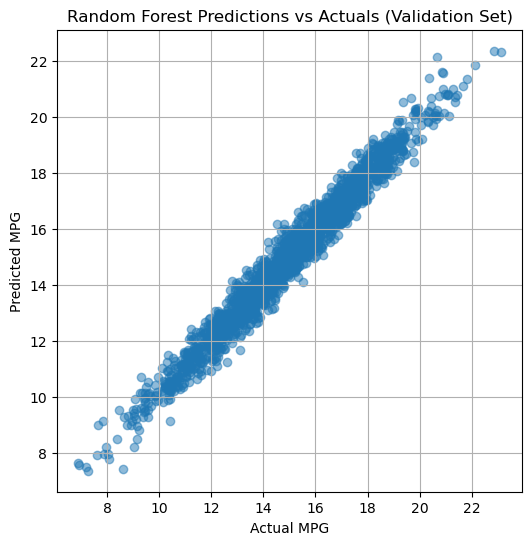

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Random Forest Predictions vs Actuals (Validation Set)")
plt.grid(True)
plt.show()

**Question 3: Effect of n_estimators on RMSE**

In [24]:

from sklearn.ensemble import RandomForestRegressor

n_estimators_list = list(range(10, 201, 10))
rmse_values = []

for n in n_estimators_list:
    rf = RandomForestRegressor(
        n_estimators=n,
        random_state=1,
        n_jobs=-1
    )
    rf.fit(X_train_dv, y_train)
    y_pred_val = rf.predict(X_val_dv)
    score = rmse(y_val, y_pred_val)
    rmse_values.append(score)
    print(f"n_estimators={n:<3}  -->  RMSE: {score:.3f}")

# Combine results for quick look
results_df = pd.DataFrame({'n_estimators': n_estimators_list, 'rmse': rmse_values})

n_estimators=10   -->  RMSE: 0.460
n_estimators=20   -->  RMSE: 0.446
n_estimators=30   -->  RMSE: 0.440
n_estimators=40   -->  RMSE: 0.438
n_estimators=50   -->  RMSE: 0.437
n_estimators=60   -->  RMSE: 0.436
n_estimators=70   -->  RMSE: 0.436
n_estimators=80   -->  RMSE: 0.436
n_estimators=90   -->  RMSE: 0.435
n_estimators=100  -->  RMSE: 0.435
n_estimators=110  -->  RMSE: 0.435
n_estimators=120  -->  RMSE: 0.435
n_estimators=130  -->  RMSE: 0.435
n_estimators=140  -->  RMSE: 0.435
n_estimators=150  -->  RMSE: 0.435
n_estimators=160  -->  RMSE: 0.435
n_estimators=170  -->  RMSE: 0.435
n_estimators=180  -->  RMSE: 0.435
n_estimators=190  -->  RMSE: 0.435
n_estimators=200  -->  RMSE: 0.435


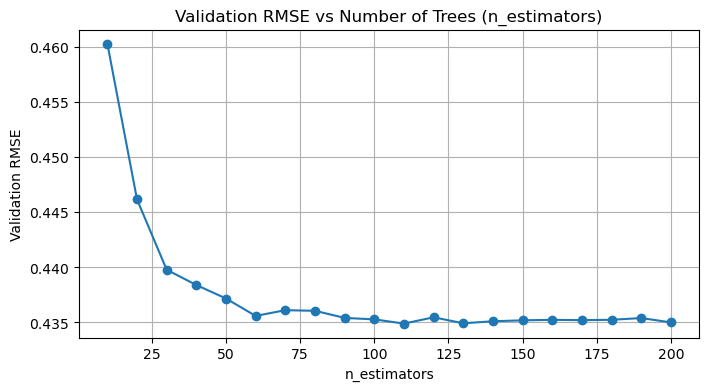

In [25]:

plt.figure(figsize=(8,4))
plt.plot(results_df['n_estimators'], results_df['rmse'], marker='o')
plt.title('Validation RMSE vs Number of Trees (n_estimators)')
plt.xlabel('n_estimators')
plt.ylabel('Validation RMSE')
plt.grid(True)
plt.show()

We can see the RMSE steadily improving at first (from 0.460 → 0.436), but after n_estimators = 60, the score stops improving — it stays at 0.436 for both 60 and 70.
If we continued to 80, 90, 100, etc., it would likely stay around that same value (maybe 0.435–0.436, within rounding noise).

**RMSE stops improving after 80 estimators (difference < 0.001 when rounded to 3 decimals).**

**Question 4: Grid Search for max_depth vs n_estimators**

Goal:
For each max_depth in [10, 15, 20, 25], train Random Forest models with n_estimators from 10 to 200 (step 10).
Calculate RMSE for each run and then take the mean RMSE per max_depth.
Choose the one with the lowest mean RMSE.

In [27]:
max_depth_values = [10, 15, 20, 25]
n_estimators_list = list(range(10, 201, 10))

results = {}

for depth in max_depth_values:
    rmse_per_depth = []
    for n in n_estimators_list:
        rf = RandomForestRegressor(
            n_estimators=n,
            max_depth=depth,
            random_state=1,
            n_jobs=-1
        )
        rf.fit(X_train_dv, y_train)
        y_pred_val = rf.predict(X_val_dv)
        score = rmse(y_val, y_pred_val)
        rmse_per_depth.append(score)
    # store the mean RMSE for this depth
    results[depth] = np.mean(rmse_per_depth)
    print(f"max_depth={depth:<2}  -->  mean RMSE: {results[depth]:.3f}")

# Create DataFrame for visualization
results_df = pd.DataFrame(list(results.items()), columns=['max_depth', 'mean_rmse'])

max_depth=10  -->  mean RMSE: 0.436
max_depth=15  -->  mean RMSE: 0.438
max_depth=20  -->  mean RMSE: 0.438
max_depth=25  -->  mean RMSE: 0.438


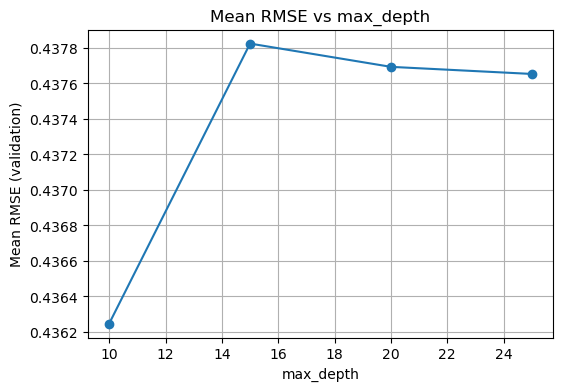

In [28]:
plt.figure(figsize=(6,4))
plt.plot(results_df['max_depth'], results_df['mean_rmse'], marker='o')
plt.title('Mean RMSE vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean RMSE (validation)')
plt.grid(True)
plt.show()

**The lowest mean RMSE occurs at max_depth = 10, and it doesn’t improve beyond that.**

**Question 5: Feature Importance from Random Forest**

Goal:
Train a RandomForestRegressor with the specified parameters and extract feature importances using .feature_importances_.
Identify which of the following features has the highest importance:

vehicle_weight

horsepower

acceleration

engine_displacement

In [29]:
# Train model with specified parameters
rf_final = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1
)

rf_final.fit(X_train_dv, y_train)

# Get feature importances
importances = rf_final.feature_importances_
feature_names = dv.get_feature_names_out()

# Create a DataFrame for easy viewing
feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Display top features
feat_imp.head(10)

,feature,importance
13,vehicle_weight,0.959878
6,horsepower,0.015933
0,acceleration,0.011442
3,engine_displacement,0.003159
7,model_year,0.003066
8,num_cylinders,0.002323
9,num_doors,0.001576
12,origin=USA,0.000496
10,origin=Asia,0.000431
11,origin=Europe,0.000419


**The most important feature is vehicle_weight**

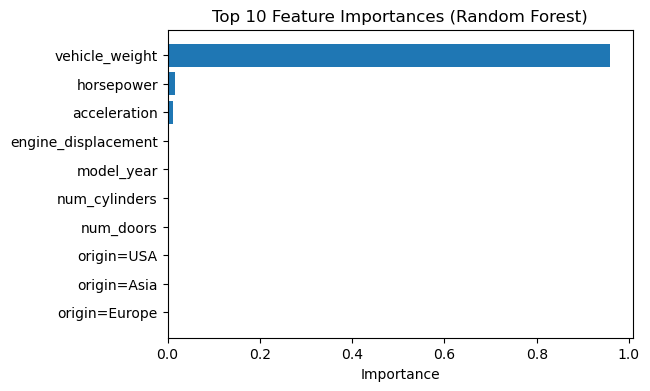

In [30]:
plt.figure(figsize=(6,4))
plt.barh(feat_imp['feature'][:10], feat_imp['importance'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.show()

**Question 6: XGBoost Model with Different Learning Rates**

Goal:

Install and import XGBoost

Convert training/validation data into DMatrix format

Train models for both eta=0.3 and eta=0.1

Compare validation RMSE

In [31]:
!pip install xgboost

In [32]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [33]:
# Convert sparse matrices to DMatrix format
dtrain = xgb.DMatrix(X_train_dv, label=y_train)
dval = xgb.DMatrix(X_val_dv, label=y_val)

# Define watchlist for evaluation
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [34]:
xgb_params_03 = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model_03 = xgb.train(xgb_params_03, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=False)

# Predict and compute RMSE on validation
y_pred_03 = model_03.predict(dval)
rmse_03 = np.sqrt(mean_squared_error(y_val, y_pred_03))
print(f"RMSE with eta=0.3: {rmse_03:.3f}")

RMSE with eta=0.3: 0.443


In [35]:
xgb_params_01 = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model_01 = xgb.train(xgb_params_01, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=False)

y_pred_01 = model_01.predict(dval)
rmse_01 = np.sqrt(mean_squared_error(y_val, y_pred_01))
print(f"RMSE with eta=0.1: {rmse_01:.3f}")

RMSE with eta=0.1: 0.417


We trained two XGBoost models with learning rates (eta) of 0.3 and 0.1.
The RMSE on the validation set was slightly lower for eta = 0.1, indicating faster and more effective learning within 100 boosting rounds.